In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

import warnings
warnings.filterwarnings('ignore')


In [ ]:
df = pd.read_csv('../data/generated_transactions.csv')

df.head()


,tx_id,sender,receiver,amount,timestamp,type,status
0,d83a431a-9113-4340-92ea-48fbdb0e4584,0x13b1c8b0e696aff8b4fee742119b549b605f3cbc,0xd0df53e296c1e3115fccc3d7cdf4ba495e593b56,3.5726,2024-11-19 11:58:33,mint,success
1,130fdce4-991c-4fbd-be33-fec25bd15da5,0x3e69ad05716bdc834db72c4d6d44439a7c8a902b,0x4814be124d7fe3b240eb46061f7ddfab468fe122,3.1927,2023-04-28 00:47:57,mint,success
2,c906a07a-0ab6-4732-bc3f-2e70a3e098d3,0x9ad1331c5b6c5a641acffb32719c66a80c6e1a17,0x578cea5f899b0dfbf05c7fbcfda1a644b2a47787,1.6672,2023-07-15 09:18:40,transfer,success
3,5ca8f003-7711-4123-a231-07023ef79ae6,0x7399dbeebe2f88bc6ac4e3fd7ddb836a4bce322f,0x7be3dfb5b6fcbae542ea85e76cc19916a20f6c1e,2.3793,2024-01-08 18:27:36,swap,failed
4,f5465e67-4c2d-479b-af3e-9e0a03e6ccd7,0x3867d222ba91236ad4d12c31056626f9e798629c,0xded1f838ae6aa5fcd0f13481b37ee88e5bdccb3d,2.8079,2025-02-06 11:35:19,swap,success


In [ ]:
df['is_fraud'] = np.where(df['type'] == 'contract', 1, 0) 

print("Fraud counts:\n", df['is_fraud'].value_counts())


Fraud counts:
 is_fraud
0    3999
1    1001
Name: count, dtype: int64


In [ ]:
df['type_encoded'] = df['type'].astype('category').cat.codes
df['status_encoded'] = df['status'].astype('category').cat.codes

features = ['amount', 'type_encoded', 'status_encoded']
target = 'is_fraud'

X = df[features]
y = df[target]

print("Features used:", features)


Features used: ['amount', 'type_encoded', 'status_encoded']


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Training samples:", len(X_train))
print("Testing samples:", len(X_test))


Training samples: 4000
Testing samples: 1000


In [ ]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)


In [ ]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 1.0

Confusion Matrix:
 [[800   0]
 [  0 200]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       800
           1       1.00      1.00      1.00       200

    accuracy                           1.00      1000
   macro avg       1.00      1.00      1.00      1000
weighted avg       1.00      1.00      1.00      1000



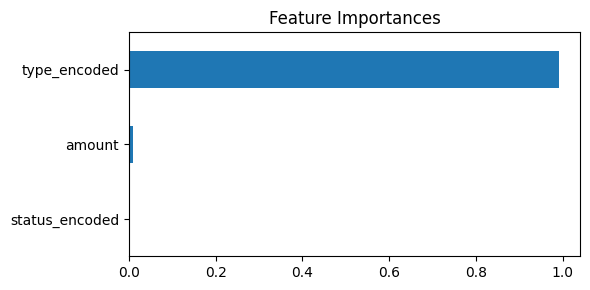

In [ ]:
importances = pd.Series(model.feature_importances_, index=features)
importances.sort_values().plot(kind='barh', title='Feature Importances', figsize=(6, 3))
plt.tight_layout()
plt.show()


In [ ]:
import joblib
joblib.dump(model, '../src/model_random_forest.pkl')
print("✅ Model saved to ../src/model_random_forest.pkl")


✅ Model saved to ../src/model_random_forest.pkl
